# House Sales in King county,WA
This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.
Goal is to explore the key influencers which cause House sales price to increase as well as to predict House sales price in 2016 based on the variables available in the dataset.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from scipy import stats
from scipy.stats import norm, skew
from sklearn.ensemble import RandomForestRegressor

## Reading the Data

##  Feature Description
ID : Unique ID of each house sold
Date : Date of House sale
Price : Price of each sold house
Bedrooms : Number of bedrooms
Bathrooms : Number of bathrooms
Sqft_living : Square footage of interior living space
Sqft_lot : Square footage of land space
Floors : Number of floors
Waterfront : Variable that indicates whether the house overlooks waterfront or not
View : An index from 0 to 4 of how good the view of the property is
Condition : An index from 1 to 5 on the condition of the house
Grade : An index from 1 to 13, where
        1-3 falls short of building construction and design
        7 has an avergae quality of construction and design
        11-13 have higher quality of construction and design
Sqft_above : Square footage of interior housing space that is above ground level
Sqft_basement : Square footage of interior housing space that is below ground level
Yr_built : Year house was built
Yr_renovated : Year house was renovated
Zipcode : Zipcode area the house is in
Lat : Lattitude
Long : Longitude
Sqft_living15 :Square footage of interior living space for nearest 15 neighbours
Sqft_lot15 :Square footage of land space for nearest 15 neighbours

In [3]:
df = pd.read_csv(r'C:\Users\lsnee\OneDrive\Desktop\House data.csv')
print(df.shape)
print(df.info())

(21613, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB
None


## Descriptive Statistics of Dataset

In [4]:
print(df.describe())

                 id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.401822e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.673622e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517    

## Are there any NULL values 

In [5]:
print(df.isnull().any())

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool


## Correlation between various features

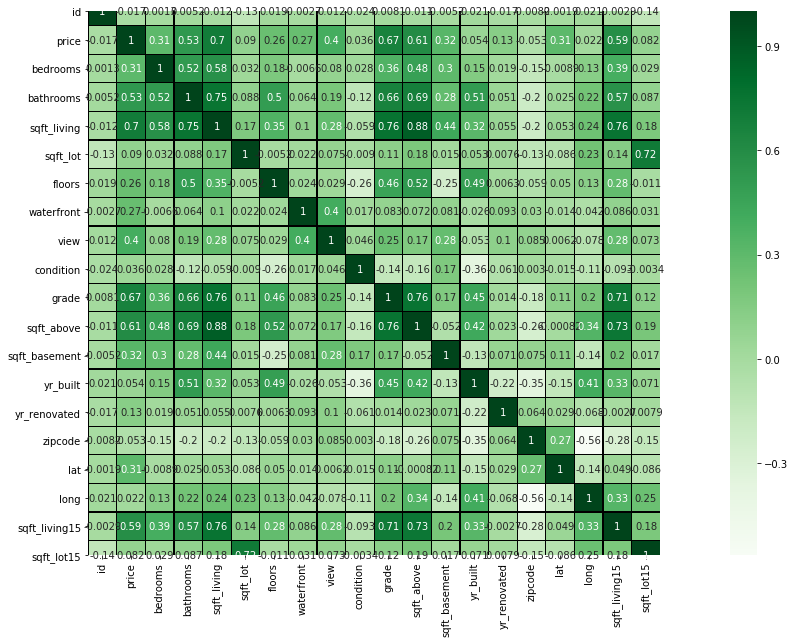

In [6]:
corr = df.corr()
plt.figure(figsize=(25,10))
Heatmap = sns.heatmap(corr,annot=True,linewidths=0.25,vmax=1.0, square=True, cmap="Greens", linecolor='k')

* Price has high positive correlation with Sqft_living and moderate positive correlation with Bathrooms,Sqft_above,View,Grade and Sqft_living15
* Price has low positive correlation with Bedrooms,floors,Sqft_basement and Yr_renovated
* Price has non significant relationship with Sqft_lot,Year,Zipcode and Sqft_lot15

## Converting Date format

In [8]:
import datetime
df['date']=pd.to_datetime(df['date'])
df = df.sort_values(by='date')
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,sqft_living15
16768,2014-05-02,437500.0,3,2.25,1970,35100,2.0,0,0,4,9,1970,0,1977,0,47.4635,2340
9596,2014-05-02,790000.0,3,2.50,2600,4750,1.0,0,0,4,9,1700,900,1951,0,47.6833,2380
9587,2014-05-02,675000.0,5,2.50,2820,67518,2.0,0,0,3,8,2820,0,1979,0,47.5794,2820
20602,2014-05-02,555000.0,4,2.50,3310,6500,2.0,0,0,3,8,3310,0,2012,0,47.5150,2380
11577,2014-05-02,440000.0,4,2.25,2160,8119,1.0,0,0,3,8,1080,1080,1966,0,47.5443,1850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7898,2015-05-14,183000.0,3,1.00,1170,7320,1.0,0,0,3,7,1170,0,1962,0,47.4685,2040
928,2015-05-14,359000.0,2,2.75,1370,1140,2.0,0,0,3,8,1080,290,2009,0,47.7052,1370
5637,2015-05-15,450000.0,5,2.00,1870,7344,1.5,0,0,3,7,1870,0,1960,0,47.5951,1870
13053,2015-05-24,445500.0,2,1.75,1390,6670,1.0,0,0,3,6,720,670,1941,0,47.6914,920


## Skewness of Data

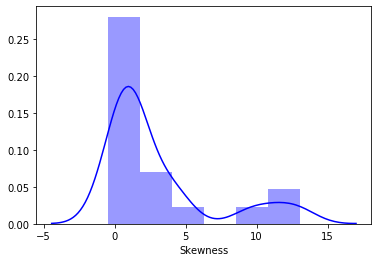

In [6]:
sns.distplot(df.skew(),color='blue',axlabel ='Skewness')

## Count of Bedrooms

There is one house with 33 bedrooms which is very unique for any house

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64


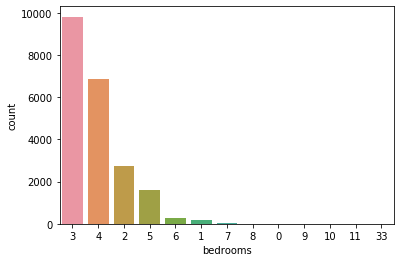

In [22]:
print(df['bedrooms'].value_counts())
sns.countplot(df.bedrooms, order = df['bedrooms'].value_counts().index)

## Count of Unique Year built values

[559 454 450 433 422 417 387 381 367 350 343 334 320 312 305 294 290 280
 271 270 265 263 256 253 250 249 248 240 239 235 230 229 228 224 223 222
 220 218 215 212 202 201 199 198 195 189 187 180 177 172 170 169 165 162
 161 156 149 143 140 139 134 132 130 126 120 115 114 106 105 104  98  95
  94  92  90  88  87  86  84  79  76  74  73  68  65  64  61  59  56  54
  52  46  45  40  38  30  29  27  24  21]


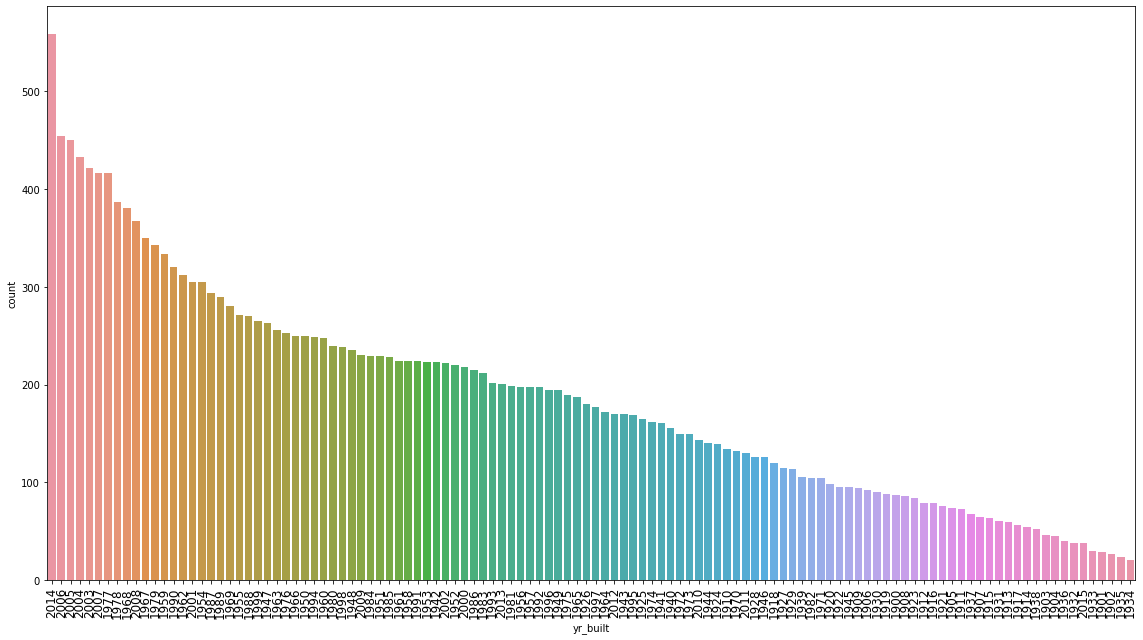

In [32]:
print(df['yr_built'].value_counts().unique())
plt.figure(figsize=(16,9))
sns.countplot(df.yr_built, order = df['yr_built'].value_counts().index)
plt.tick_params(axis='x',which='major',labelsize=12)
plt.xticks(x='yr_built',rotation=90)
plt.tight_layout()

## Count of bathrooms

There are 10 houses with 0 bathrooms

2.50    5380
1.00    3852
1.75    3048
2.25    2047
2.00    1930
1.50    1446
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      72
4.75      23
5.00      21
5.25      13
0.00      10
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
8.00       2
6.25       2
6.50       2
6.75       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64


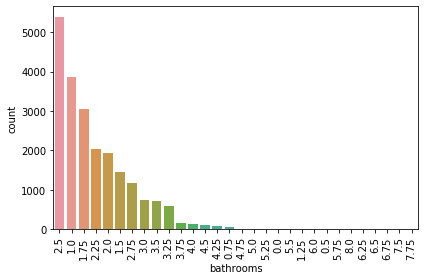

In [29]:
print(df['bathrooms'].value_counts())
sns.countplot(df.bathrooms, order = df['bathrooms'].value_counts().index)
plt.tick_params(axis='x',which='major',labelsize=10)
plt.xticks(x='bathrooms',rotation=90)
plt.tight_layout()

## Count of Floors

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64


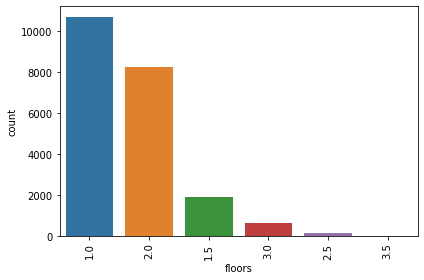

In [7]:
print(df['floors'].value_counts())
sns.countplot(df.floors, order = df['floors'].value_counts().index)
plt.tick_params(axis='x',which='major',labelsize=10)
plt.xticks(x='floors',rotation=90)
plt.tight_layout()

## Count of Grade

7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: grade, dtype: int64


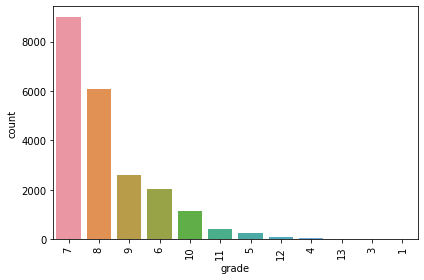

In [35]:
print(df['grade'].value_counts())
sns.countplot(df.grade, order = df['grade'].value_counts().index)
plt.tick_params(axis='x',which='major',labelsize=10)
plt.xticks(x='grade',rotation=90)
plt.tight_layout()

## Scatter plot of Independent Variables

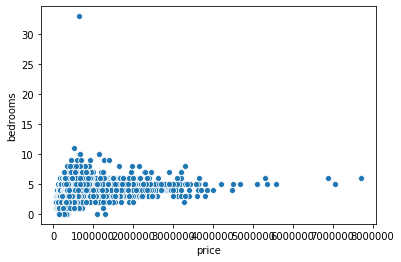

In [9]:
sns.scatterplot(df.price,df.bedrooms)

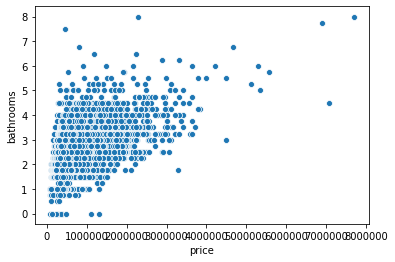

In [10]:
sns.scatterplot(df.price,df.bathrooms)

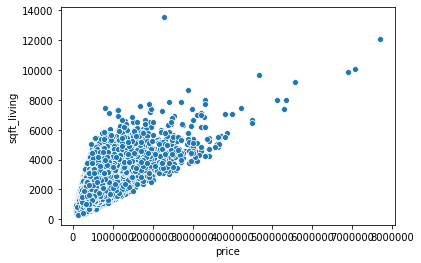

In [11]:
sns.scatterplot(df.price,df.sqft_living)

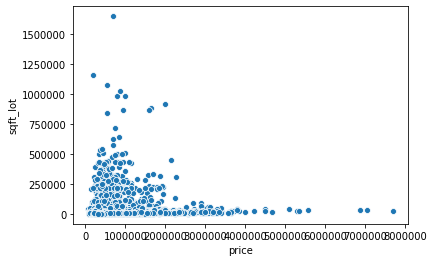

In [12]:
sns.scatterplot(df.price,df.sqft_lot)

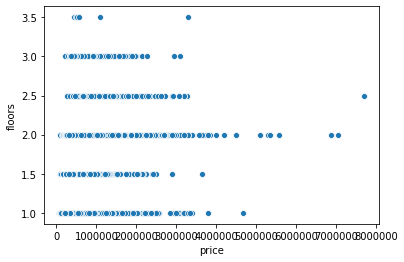

In [13]:
sns.scatterplot(df.price,df.floors)

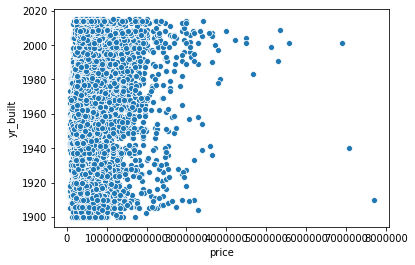

In [14]:
sns.scatterplot(df.price,df.yr_built)

## Removing Outliers from 'Bedrooms' column

In [7]:
q1 = df['bedrooms'].quantile(0.25)
q3 = df['bedrooms'].quantile(0.75)
IQR = q3-q1
IQR
Lower_Fence = q1 - (1.5 * IQR)
Upper_Fence = q3 + (1.5 * IQR)
df = df[(df['bedrooms']>=Lower_Fence)&(df['bedrooms']<=Upper_Fence)]
df.shape

(21067, 21)

## Removing Outlier from 'bathrooms' column

In [8]:
q1 = df['bathrooms'].quantile(0.25)
q3 = df['bathrooms'].quantile(0.75)
IQR = q3-q1
IQR
Lower_Fence = q1 - (1.5 * IQR)
Upper_Fence = q3 + (1.5 * IQR)
df = df[(df['bathrooms']>=Lower_Fence)&(df['bathrooms']<=Upper_Fence)]
df.shape

(20606, 21)

## Removing Outliers from Grade

In [10]:
q1 = df['grade'].quantile(0.25)
q3 = df['grade'].quantile(0.75)
IQR = q3-q1
IQR
Lower_Fence = q1 - (1.5 * IQR)
Upper_Fence = q3 + (1.5 * IQR)
df = df[(df['grade']>=Lower_Fence)&(df['grade']<=Upper_Fence)]
df.shape

(19137, 21)

## Removing Outliers from sqft_lot

In [11]:
q1 = df['sqft_lot'].quantile(0.25)
q3 = df['sqft_lot'].quantile(0.75)
IQR = q3-q1
IQR
Lower_Fence = q1 - (1.5 * IQR)
Upper_Fence = q3 + (1.5 * IQR)
df = df[(df['sqft_lot']>=Lower_Fence)&(df['sqft_lot']<=Upper_Fence)]
df.shape

(17199, 21)

## Removing Outliers from sqft_living

In [12]:
q1 = df['sqft_living'].quantile(0.25)
q3 = df['sqft_living'].quantile(0.75)
IQR = q3-q1
IQR
Lower_Fence = q1 - (1.5 * IQR)
Upper_Fence = q3 + (1.5 * IQR)
df = df[(df['sqft_living']>=Lower_Fence)&(df['sqft_living']<=Upper_Fence)]
df.shape

(17007, 21)

## Removing Outliers from sqft_above

In [13]:
q1 = df['sqft_above'].quantile(0.25)
q3 = df['sqft_above'].quantile(0.75)
IQR = q3-q1
IQR
Lower_Fence = q1 - (1.5 * IQR)
Upper_Fence = q3 + (1.5 * IQR)
df = df[(df['sqft_above']>=Lower_Fence)&(df['sqft_above']<=Upper_Fence)]
df.shape

(16626, 21)

## Removing Outliers sqft_living15

In [14]:
q1 = df['sqft_living15'].quantile(0.25)
q3 = df['sqft_living15'].quantile(0.75)
IQR = q3-q1
IQR
Lower_Fence = q1 - (1.5 * IQR)
Upper_Fence = q3 + (1.5 * IQR)
df = df[(df['sqft_living15']>=Lower_Fence)&(df['sqft_living15']<=Upper_Fence)]
df.shape

(16446, 21)

## Defining Dependent and Independent Variables

After analyzing the correlation between various variables and Price,variables that have significant linear relationship with Price were chosen as predictor variables.

In [8]:
col = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','grade','view','sqft_above','yr_built','yr_renovated','sqft_living15','sqft_basement','waterfront']
X = df[col]
Y = df['price']
print(X.shape)
print(Y.shape)

(21613, 13)
(21613,)


## Divide the data into train and test sets

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=100)

## Glance at the shape of the train and test sets

In [10]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(17290, 13)
(4323, 13)
(17290,)
(4323,)


# Random Forest Regression : Fit the train sets into the model

In [11]:
rf = RandomForestRegressor(n_estimators=100)
model_rf = rf.fit(X_train,Y_train)

## Predict Test variable

In [12]:
y_rf_pred = model_rf.predict(X_test)
output= pd.DataFrame({"Actual":Y_test, "Predicted" : y_rf_pred})
output

,Actual,Predicted
19836,285000.0,441554.000000
10442,239950.0,334558.013333
20548,460000.0,540463.830000
11014,397500.0,538126.450000
4138,545000.0,551559.080000
...,...,...
5625,235000.0,242560.260000
8698,500000.0,530676.560000
9786,850000.0,689346.700000
2784,340000.0,502545.900000


## Metrics of the Model

In [13]:
def mean_absolute_percentage_error(Y_test,y_rf_pred):
    Y_test, Y_pred = np.array(Y_test), np.array(y_rf_pred)
    return np.mean(np.abs((Y_test - y_rf_pred) / Y_test)) * 100
print('Mean Absolute Percentage Error(MAPE) : ', mean_absolute_percentage_error(Y_test,y_rf_pred))

Mean Absolute Percentage Error(MAPE) :  23.610455953860978


In [14]:
print('Mean Absolute Error : ', metrics.mean_absolute_error(Y_test,y_rf_pred))
print('Root Mean Squared Error : ', np.sqrt(metrics.mean_squared_error(Y_test,y_rf_pred)))
print('R Squared Value of the Model : ', metrics.r2_score(Y_test,y_rf_pred))

Mean Absolute Error :  116561.97252675978
Root Mean Squared Error :  183517.4249388906
R Squared Value of the Model :  0.7504356128071856


## Plotting the results

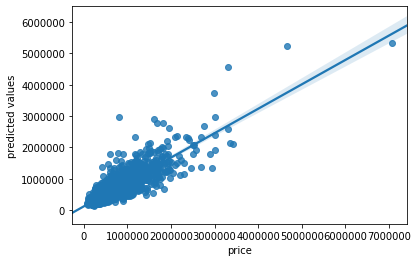

In [15]:
plt.xlabel("y_test")
plt.ylabel("predicted values")
sns.regplot(Y_test,y_rf_pred)

# Simple Linear Regression

In [16]:
regressor = LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Coefficients of the model

In [17]:
print(regressor.intercept_)
print(regressor.coef_)

6861857.371179586
[-3.70930131e+04  5.39282723e+04  1.05283408e+02 -2.34376531e-01
  2.59860987e+04  1.21697932e+05  4.18506015e+04  4.97023584e+01
 -3.88632350e+03 -6.32738440e+00  2.21348389e+01  5.55810500e+01
  5.88973238e+05]


## Prediction

In [18]:
Y_pred = regressor.predict(X_test)
Y_pred = pd.DataFrame(Y_pred, columns=['Predicted'])
Y_test = pd.DataFrame(Y_test,columns=['Actual'])
print(Y_pred,Y_test)

          Predicted
0     404299.338087
1     391730.544994
2     630161.046458
3     408239.896657
4     484850.425661
...             ...
4318  284230.968251
4319  526069.731510
4320  698272.458526
4321  573630.213148
4322  683116.227948

[4323 rows x 1 columns] Empty DataFrame
Columns: [Actual]
Index: []


* Predicting Selling Prices :
Now that we have created the model, we can plug in the values of various variables and predict the House price.
For example :
Consider a House with
Bedrooms = 2
Bathrooms = 2
Square footage of living space = 2500 sqft
Square footage of the house lot = 5000 sqft
Number of floors = 2
Grade of the house = 7
Noumber of views = 0
Sqft_above = 2170 sqft
Year house was built = 2005
Year house was renovated = 0 (ie NO renovation)
Sqft_living15 = 2500 sqft
Sqft_basement = 0 (ie NO basement)
Waterfront = 0
Let's see what will be the House price based on above features

In [42]:
col = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','grade','view','sqft_above','yr_built','yr_renovated','sqft_living15','sqft_basement','waterfront']
Feature_input = [[2,2,2500,5000,2,7,0,2170,2005,0,2500,0,0]]
for i,price in enumerate(regressor.predict(Feature_input)):
        print("Predicted selling price for Client's home: ${:,.2f}".format(price))

Predicted selling price for Client's home: $432,534.85


Tableau Visualization : https://public.tableau.com/profile/neerajals#!/vizhome/Capstone2_15816359523670/Story1